In [158]:
import os 
import sys
import pygwalker as pyg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [159]:

#Importing Configs
# Define the path where config.py is located
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
database_file = config.database
database_folder = config.database_folder
bert_models = config.bert_models
bert_models_local = config.bert_models_local
Sentiment_models = config.Sentiment_models
finbert_models = config.finbert_models

Body = config.Body
Model = config.Model
Model_Subfolder = f'/{Body} Texts/{Model}'
#Model_Folder = config.texts
Model_Folder = config.Sentiment_models
Model_Folder = Model_Folder + Model_Subfolder
Model_Folder = config.Sentiment_models

Body_2 = config.Body_2
Model_2 = config.Model_2
Model_Subfolder_2 = f'/{Body_2} Texts/{Model_2}'
Model_Folder_2 = config.texts
Model_Folder_2 = Model_Folder_2 + Model_Subfolder_2


/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [160]:
df = pd.read_csv(f"{finbert_models}/{Body}_{Model}_finbert model.csv")
df_2 = pd.read_csv(f"{finbert_models}/{Body_2}_{Model_2}_finbert model.csv")

print(df.head())
print(df_2.head())
print(df_2.columns)


   Unnamed: 0.1  Unnamed: 0        date  \
0             0           0  2015-12-11   
1             1           1  2015-12-11   
2             2           2  2015-12-11   
3             3           3  2015-12-11   
4             4           4  2015-12-11   

                                              title         type  \
0  The transmission of recent non-standard measures  Peter Praet   
1  The transmission of recent non-standard measures  Peter Praet   
2  The transmission of recent non-standard measures  Peter Praet   
3  The transmission of recent non-standard measures  Peter Praet   
4  The transmission of recent non-standard measures  Peter Praet   

                                             segment  compound  
0  the transmission of recent nonstandard measure...   neutral  
1  those measures have included reducing key poli...  positive  
2  they were decided against the backdrop of cred...  negative  
3  this complex package of policy measures has le...  positive  
4  star

In [161]:
df['compound'] = df['compound'].replace({'positive': 1, 'neutral' : 0, 'negative' : -1})
df_2['compound'] = df_2['compound'].replace({'positive': 1, 'neutral' : 0, 'negative' : -1})

In [162]:
print(df.columns)
print(df_2.columns)
print(df.head())

Index(['Unnamed: 0.1', 'Unnamed: 0', 'date', 'title', 'type', 'segment',
       'compound'],
      dtype='object')
Index(['Unnamed: 0', 'date', 'title', 'type', 'segment', 'compound'], dtype='object')
   Unnamed: 0.1  Unnamed: 0        date  \
0             0           0  2015-12-11   
1             1           1  2015-12-11   
2             2           2  2015-12-11   
3             3           3  2015-12-11   
4             4           4  2015-12-11   

                                              title         type  \
0  The transmission of recent non-standard measures  Peter Praet   
1  The transmission of recent non-standard measures  Peter Praet   
2  The transmission of recent non-standard measures  Peter Praet   
3  The transmission of recent non-standard measures  Peter Praet   
4  The transmission of recent non-standard measures  Peter Praet   

                                             segment  compound  
0  the transmission of recent nonstandard measure...         0  
1

In [163]:
df_group = df.copy(deep=True)
df_group = df_group.drop(columns=['Unnamed: 0', 'title', 'type', 'segment'])
#df_group['monthly'] = df_group['date'].str[0:7]
df_group['monthly'] = df_group['date']

print(df_group.columns)
df_group = df_group[['monthly', 'compound']]
df_group = df_group.groupby('monthly', as_index = False).mean()
print(df_2.head()) 

df_2_group = df_2.copy(deep=True)
df_2_group = df_2_group.drop(columns=['Unnamed: 0', 'title', 'type', 'segment'])
df_2_group['date'] = df_2_group['date'].astype(str)
df_2_group['monthly'] = df_2_group['date']
#df_2_group['monthly'] = df_2_group['date'].str[0:7]
df_2_group = df_2_group[['monthly', 'compound']]
df_2_group = df_2_group.groupby('monthly', as_index = False).mean()



df_group = df_group.rename(columns = {'compound' : f'{Body}_compound'})
df_2_group = df_2_group.rename(columns = {'compound' : f'{Body_2}_compound'})

print(df_group.head())
print(df_2_group.head())



df_merged = df_group.merge(df_2_group, on='monthly', how='inner')
df_merged.fillna(0, inplace=True)
print(df_merged.columns)

Index(['Unnamed: 0.1', 'date', 'compound', 'monthly'], dtype='object')
   Unnamed: 0        date                             title  \
0           0  1998-11-06  Examining community reinvestment   
1           1  1998-11-06  Examining community reinvestment   
2           2  1998-11-06  Examining community reinvestment   
3           3  1998-11-06  Examining community reinvestment   
4           4  1998-11-06  Examining community reinvestment   

                          type  \
0  Governor Edward M. Gramlich   
1  Governor Edward M. Gramlich   
2  Governor Edward M. Gramlich   
3  Governor Edward M. Gramlich   
4  Governor Edward M. Gramlich   

                                             segment  compound  
0  examining community reinvestment the federal r...         0  
1  our well known function is to set monetary pol...         0  
2      that is not what i plan to talk about today .         0  
3  what i would like to talk about is one of the ...         0  
4  this act was pass

In [164]:

df_merged['net_diff'] = df_merged['ECB_compound'] - df_merged['Fed_compound']

In [165]:
funds = pd.read_excel('/Users/kylenabors/Documents/Database/Other Data/FedFundsRate.xlsx', sheet_name='Monthly')
print(funds.head())
energy = pd.read_csv('/Users/kylenabors/Documents/Database/Other Data/Energy Prices/US Energy CPI.csv')
print(energy.head())

        DATE  FEDFUNDS Date Adjusted
0 1999-12-31      5.45    2000-01-01
1 2000-01-31      5.73    2000-02-01
2 2000-02-29      5.85    2000-03-01
3 2000-03-31      6.02    2000-04-01
4 2000-04-30      6.27    2000-05-01
         DATE  CPIENGSL
0  2000-01-01     115.0
1  2000-02-01     118.8
2  2000-03-01     124.3
3  2000-04-01     120.9
4  2000-05-01     120.0


In [166]:
funds['Diff'] = funds['FEDFUNDS'].diff()


In [167]:
df_merged.to_csv(f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv", index=False)

In [168]:
##########3#######################3333trggfdgfgdfgfdgdfgdfgggggggg########sssssssdddddddgwalker = pyg.walk(df_merged)

In [169]:
print(df_merged.describe())

       ECB_compound  Fed_compound   net_diff
count     70.000000     70.000000  70.000000
mean       0.007902     -0.016790   0.024693
std        0.165218      0.176489   0.234899
min       -0.535088     -0.361842  -0.606723
25%       -0.084814     -0.130370  -0.135709
50%       -0.006329     -0.035153   0.030735
75%        0.096809      0.077970   0.167198
max        0.486486      0.571429   0.745479


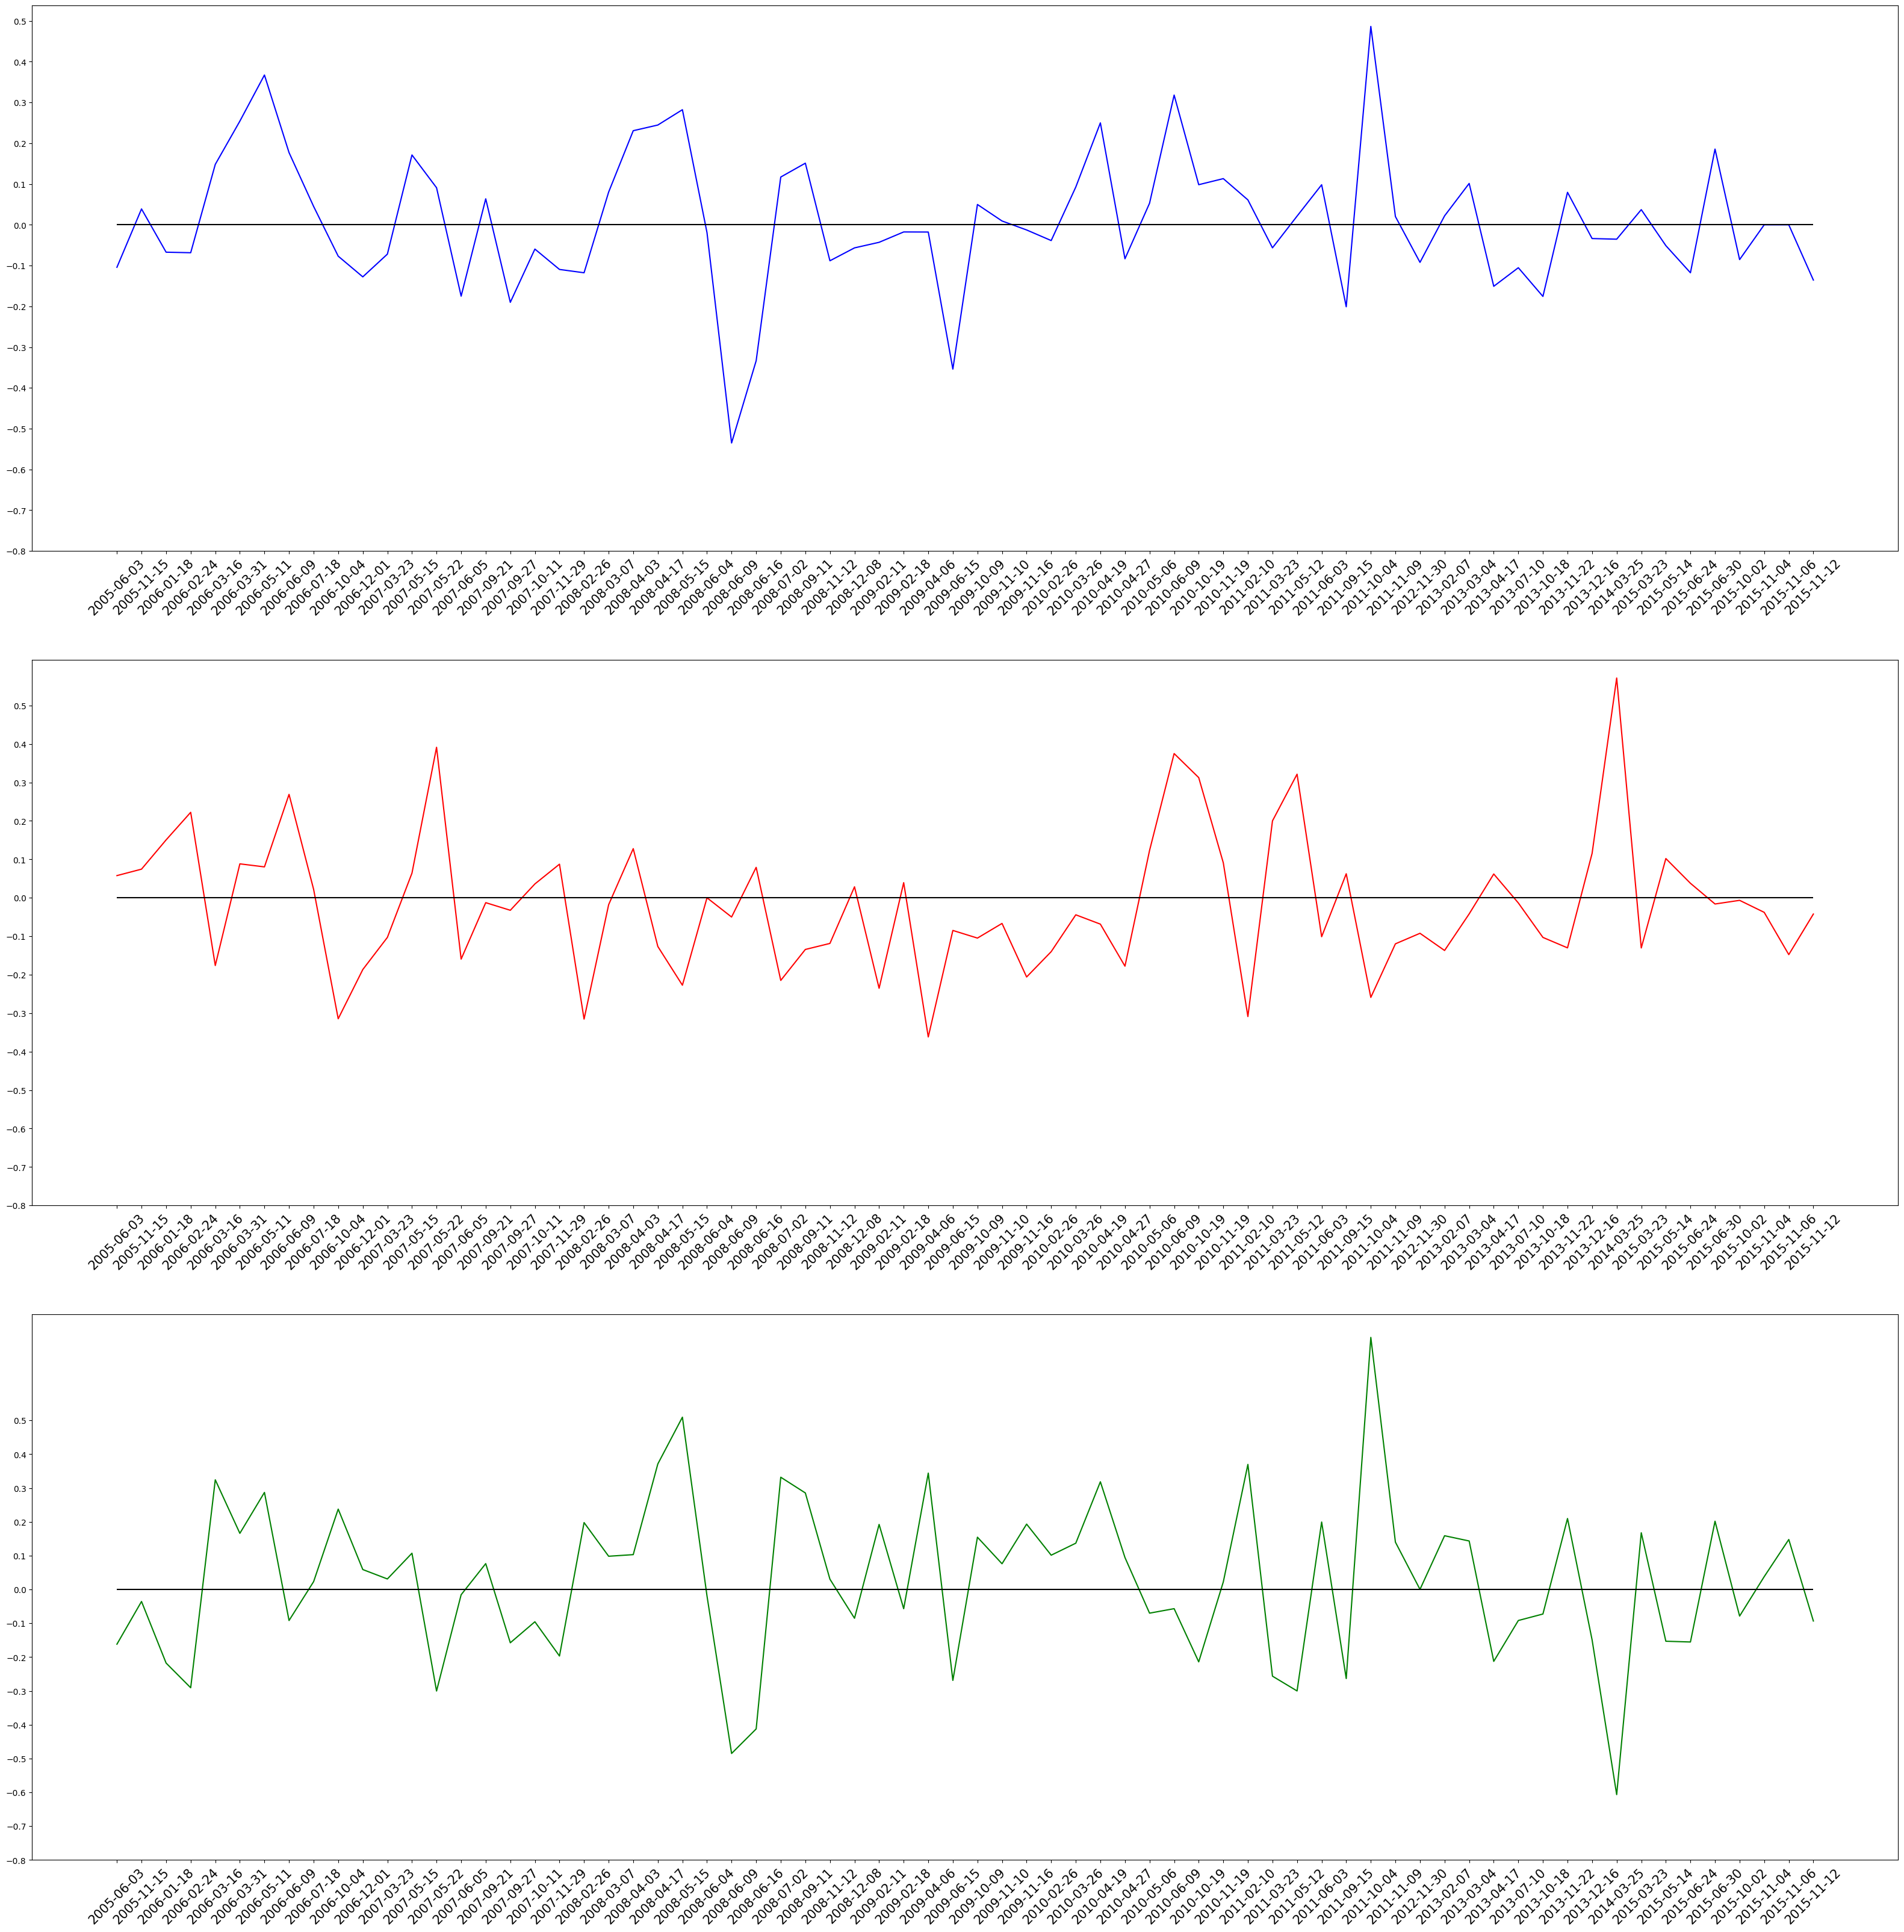

In [170]:


# Create a list of x-axis tick positions
num_ticks = 60  # Adjust this number as needed
x_tick_positions = df_merged['monthly'].iloc[::len(df_merged) // num_ticks].tolist()

y = 0
fig, axs = plt.subplots(3, 1, figsize=(40, 40))
axs[0].plot(df_merged['monthly'], df_merged['ECB_compound'], color='blue', label='Net Sentiment')
axs[1].plot(df_merged['monthly'], df_merged['Fed_compound'], color='red', label='Net Sentiment')
axs[0].hlines(y, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')
axs[1].hlines(y, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')

axs[2].plot(df_merged['monthly'], df_merged['net_diff'], color='green', label='Net Sentiment')
axs[2].hlines(y, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')
# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions)
axs[1].set_xticks(x_tick_positions)
axs[2].set_xticks(x_tick_positions)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)
axs[2].tick_params(axis='x', rotation=45, labelsize=15)

axs[0].set_yticks(np.arange(-0.8, 0.6, .1))
axs[1].set_yticks(np.arange(-0.8, 0.6, .1))
axs[2].set_yticks(np.arange(-0.8, 0.6, .1))

plt.show()


In [171]:
x = 0
l = 20
for i in range(l):
    x += 1
    if x % 2 == 1:
        print(x)

1
3
5
7
9
11
13
15
17
19
